In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Path to the GeoJSON file
data = pd.read_csv('Resources/all_month.csv')
data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-08-25T09:26:27.480Z,33.769000,-116.142833,4.84,0.82,ml,17.0,104.00,0.071150,0.1900,...,2023-08-25T09:29:57.187Z,"9 km NE of Indio, CA",earthquake,0.33,0.81,0.133,13.0,automatic,ci,ci
1,2023-08-25T09:24:59.950Z,33.777333,-116.144000,0.93,0.68,ml,16.0,105.00,0.067410,0.1900,...,2023-08-25T09:28:37.994Z,"9 km NE of Indio, CA",earthquake,0.42,0.90,0.113,8.0,automatic,ci,ci
2,2023-08-25T09:24:17.150Z,33.770000,-116.139500,3.48,0.73,ml,14.0,105.00,0.073350,0.2000,...,2023-08-25T09:27:50.625Z,"9 km NE of Indio, CA",earthquake,0.46,1.91,0.151,10.0,automatic,ci,ci
3,2023-08-25T09:11:15.363Z,38.154900,-117.818400,10.10,2.00,ml,21.0,131.84,0.117000,0.3487,...,2023-08-25T09:13:49.965Z,"36 km SE of Mina, Nevada",earthquake,NaN,0.40,0.560,14.0,automatic,nn,nn
4,2023-08-25T08:59:02.690Z,63.103900,-151.437300,3.80,1.10,ml,NaN,NaN,NaN,0.7600,...,2023-08-25T09:01:42.957Z,"50 km SSE of Denali National Park, Alaska",earthquake,NaN,0.60,NaN,NaN,automatic,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11029,2023-07-26T09:54:34.610Z,38.811668,-122.771835,1.27,0.70,md,10.0,135.00,0.007094,0.0200,...,2023-07-26T11:38:12.999Z,"4 km NNW of The Geysers, CA",earthquake,0.42,0.72,0.290,11.0,automatic,nc,nc
11030,2023-07-26T09:48:37.824Z,36.729900,-116.081200,4.00,-0.30,ml,7.0,111.00,0.028000,0.0821,...,2023-07-26T15:45:50.272Z,"40 km WNW of Indian Springs, Nevada",earthquake,NaN,2.00,0.070,3.0,reviewed,nn,nn
11031,2023-07-26T09:47:44.670Z,37.153500,-121.525167,9.77,0.63,md,10.0,79.00,0.060550,0.0500,...,2023-07-26T23:50:12.237Z,"11 km NE of San Martin, CA",earthquake,0.36,0.82,0.347,13.0,reviewed,nc,nc
11032,2023-07-26T09:47:33.120Z,36.723167,-121.377167,2.10,0.96,md,20.0,163.00,0.029200,0.0700,...,2023-07-26T23:40:11.178Z,"9 km SW of Tres Pinos, CA",earthquake,0.30,0.52,0.260,20.0,reviewed,nc,nc


In [3]:
column_list = data.columns.tolist()
column_list

['time',
 'latitude',
 'longitude',
 'depth',
 'mag',
 'magType',
 'nst',
 'gap',
 'dmin',
 'rms',
 'net',
 'id',
 'updated',
 'place',
 'type',
 'horizontalError',
 'depthError',
 'magError',
 'magNst',
 'status',
 'locationSource',
 'magSource']

In [4]:
# Remove unwanted columns
remove = ['time',
          'net',
          'id',
          'updated',
          'place',
          'type',
          'horizontalError',
          'depthError',
          'magError',
          'magNst',
          'status',
          'locationSource',
          'magSource']

earthquake_df = data.drop(columns=remove)
earthquake_df

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms
0,33.769000,-116.142833,4.84,0.82,ml,17.0,104.00,0.071150,0.1900
1,33.777333,-116.144000,0.93,0.68,ml,16.0,105.00,0.067410,0.1900
2,33.770000,-116.139500,3.48,0.73,ml,14.0,105.00,0.073350,0.2000
3,38.154900,-117.818400,10.10,2.00,ml,21.0,131.84,0.117000,0.3487
4,63.103900,-151.437300,3.80,1.10,ml,NaN,NaN,NaN,0.7600
...,...,...,...,...,...,...,...,...,...
11029,38.811668,-122.771835,1.27,0.70,md,10.0,135.00,0.007094,0.0200
11030,36.729900,-116.081200,4.00,-0.30,ml,7.0,111.00,0.028000,0.0821
11031,37.153500,-121.525167,9.77,0.63,md,10.0,79.00,0.060550,0.0500
11032,36.723167,-121.377167,2.10,0.96,md,20.0,163.00,0.029200,0.0700


In [5]:
earthquake_df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,11034.000000,11034.000000,11034.000000,11034.000000,8171.000000,8170.000000,5821.000000,11034.000000
mean,41.848652,-121.824125,23.118156,1.443581,22.148941,115.529027,0.629854,0.288694
std,18.967851,63.963829,52.468052,1.197573,22.786476,62.718484,2.017939,0.261887
min,-60.543200,-179.997900,-3.360000,-1.120000,0.000000,12.000000,0.000000,0.000000
25%,34.245708,-155.173708,2.400000,0.690000,9.000000,70.000000,0.025560,0.090000
50%,40.053300,-123.236000,7.300000,1.220000,15.000000,98.000000,0.062550,0.180000
75%,58.187267,-117.415625,17.952500,1.900000,27.000000,146.000000,0.192562,0.460000
max,83.467300,179.978700,646.537000,6.500000,336.000000,360.000000,39.991000,2.150000


In [6]:
# Drop any rows in the DataFrame that contain missing values (NaN)
earthquake_df.dropna(inplace=True)

# Reset the index after removing rows
earthquake_df.reset_index(drop=True, inplace=True)
earthquake_df

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms
0,33.769000,-116.142833,4.84,0.82,ml,17.0,104.00,0.071150,0.1900
1,33.777333,-116.144000,0.93,0.68,ml,16.0,105.00,0.067410,0.1900
2,33.770000,-116.139500,3.48,0.73,ml,14.0,105.00,0.073350,0.2000
3,38.154900,-117.818400,10.10,2.00,ml,21.0,131.84,0.117000,0.3487
4,34.058666,-117.116669,10.17,0.84,ml,15.0,112.00,0.050080,0.1100
...,...,...,...,...,...,...,...,...,...
5816,38.811668,-122.771835,1.27,0.70,md,10.0,135.00,0.007094,0.0200
5817,36.729900,-116.081200,4.00,-0.30,ml,7.0,111.00,0.028000,0.0821
5818,37.153500,-121.525167,9.77,0.63,md,10.0,79.00,0.060550,0.0500
5819,36.723167,-121.377167,2.10,0.96,md,20.0,163.00,0.029200,0.0700


In [7]:
earthquake_df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,5821.000000,5821.000000,5821.000000,5821.000000,5821.000000,5821.000000,5821.000000,5821.000000
mean,32.761907,-95.451557,20.575264,1.749109,25.577392,112.350310,0.629854,0.228306
std,17.269532,70.092674,63.840909,1.372880,25.299819,62.081683,2.017939,0.246715
min,-60.543200,-179.986900,-3.360000,-0.960000,2.000000,12.000000,0.000000,0.000000
25%,33.512833,-122.201500,2.740000,0.780000,11.000000,67.000000,0.025560,0.070000
50%,36.767200,-117.876333,6.902808,1.300000,19.000000,95.000000,0.062550,0.150000
75%,38.842167,-110.746167,11.480000,2.300000,30.000000,142.000000,0.192562,0.260000
max,83.467300,179.978700,646.537000,6.500000,336.000000,360.000000,39.991000,2.000000


In [8]:
# Preprocess the data
earthquake_df = pd.get_dummies(earthquake_df, columns=['magType'])
earthquake_df

,latitude,longitude,depth,mag,nst,gap,dmin,rms,magType_mb,magType_mb_lg,magType_md,magType_mh,magType_ml,magType_mw,magType_mwr,magType_mww
0,33.769000,-116.142833,4.84,0.82,17.0,104.00,0.071150,0.1900,0,0,0,0,1,0,0,0
1,33.777333,-116.144000,0.93,0.68,16.0,105.00,0.067410,0.1900,0,0,0,0,1,0,0,0
2,33.770000,-116.139500,3.48,0.73,14.0,105.00,0.073350,0.2000,0,0,0,0,1,0,0,0
3,38.154900,-117.818400,10.10,2.00,21.0,131.84,0.117000,0.3487,0,0,0,0,1,0,0,0
4,34.058666,-117.116669,10.17,0.84,15.0,112.00,0.050080,0.1100,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,38.811668,-122.771835,1.27,0.70,10.0,135.00,0.007094,0.0200,0,0,1,0,0,0,0,0
5817,36.729900,-116.081200,4.00,-0.30,7.0,111.00,0.028000,0.0821,0,0,0,0,1,0,0,0
5818,37.153500,-121.525167,9.77,0.63,10.0,79.00,0.060550,0.0500,0,0,1,0,0,0,0,0
5819,36.723167,-121.377167,2.10,0.96,20.0,163.00,0.029200,0.0700,0,0,1,0,0,0,0,0


In [9]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = earthquake_df['mag']

# Separate the X variable, the features
X = earthquake_df.drop(columns='mag')

In [10]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# len(X_train.iloc[0])

In [11]:
# Check the number of examples in train data sets
X_train.shape

(4365, 15)

In [12]:
# Check the number of examples in test data sets
X_test.shape

(1456, 15)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# Standardize the features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [15]:
# Standardize validation set features
X_val_scaled = scaler.transform(X_test)

In [16]:
from sklearn.neural_network import MLPRegressor

In [17]:
# Create and train an MLPRegressor
model = MLPRegressor(max_iter=1400)
model.fit(train_scaled, y_train)

MLPRegressor(max_iter=1400)

In [18]:
# Make predictions
y_pred = model.predict(test_scaled)

In [19]:
# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")

RMSE: 0.43


In [20]:
# .......................Creating a Baseline model 

# Calculate the mean magnitude of the training data
mean_magnitude = np.mean(y_train)

In [21]:
# Create an array of mean predictions for the test data
baseline_predictions = np.full_like(y_test, fill_value=mean_magnitude)

In [22]:
# Calculate RMSE for the baseline model
baseline_rmse = mean_squared_error(y_test, baseline_predictions, squared=False)

print(f"Mean Magnitude: {mean_magnitude:.2f}")
print(f"Baseline RMSE: {baseline_rmse:.2f}")

Mean Magnitude: 1.73
Baseline RMSE: 1.40


In [23]:
# Generate random predictions within the range of magnitudes in the training data
min_magnitude = np.min(y_train)
max_magnitude = np.max(y_train)
num_test_samples = len(y_test)

random_predictions = np.random.uniform(min_magnitude, max_magnitude, num_test_samples)

In [24]:
# Calculate RMSE for the random prediction baseline
random_baseline_rmse = mean_squared_error(y_test, random_predictions, squared=False)

print(f"Random Prediction Baseline RMSE: {random_baseline_rmse:.2f}")

Random Prediction Baseline RMSE: 2.81


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [26]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

In [27]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(train_scaled, y_train, validation_data=(X_val_scaled, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluate the model on the test data
y_pred_nn = model.predict(test_scaled)
nn_rmse = mean_squared_error(y_test, y_pred_nn, squared=False)

print(f"Neural Network RMSE: {nn_rmse:.2f}")

Epoch 1/50
137/137 [==============================] - 2s 6ms/step - loss: 1.0290 - val_loss: 0.3867
Epoch 2/50
137/137 [==============================] - 1s 4ms/step - loss: 0.3368 - val_loss: 0.3018
Epoch 3/50
137/137 [==============================] - 1s 4ms/step - loss: 0.2874 - val_loss: 0.2692
Epoch 4/50
137/137 [==============================] - 1s 4ms/step - loss: 0.2646 - val_loss: 0.2564
Epoch 5/50
137/137 [==============================] - 1s 5ms/step - loss: 0.2527 - val_loss: 0.2495
Epoch 6/50
137/137 [==============================] - 1s 4ms/step - loss: 0.2405 - val_loss: 0.2438
Epoch 7/50
137/137 [==============================] - 1s 4ms/step - loss: 0.2355 - val_loss: 0.2358
Epoch 8/50
137/137 [==============================] - 1s 4ms/step - loss: 0.2295 - val_loss: 0.2354
Epoch 9/50
137/137 [==============================] - 1s 4ms/step - loss: 0.2238 - val_loss: 0.2309
Epoch 10/50
137/137 [==============================] - 1s 5ms/step - loss: 0.2202 - val_loss: 0.2230

In [28]:
# Make predictions using the trained model
y_pred_nn = model.predict(test_scaled)

# Print the predicted magnitudes
print("Predicted Magnitudes:")
print(y_pred_nn)

46/46 [==============================] - 0s 3ms/step
Predicted Magnitudes:
[[2.1652868]
 [1.2610862]
 [2.228501 ]
 ...
 [1.114042 ]
 [1.4802922]
 [2.372853 ]]


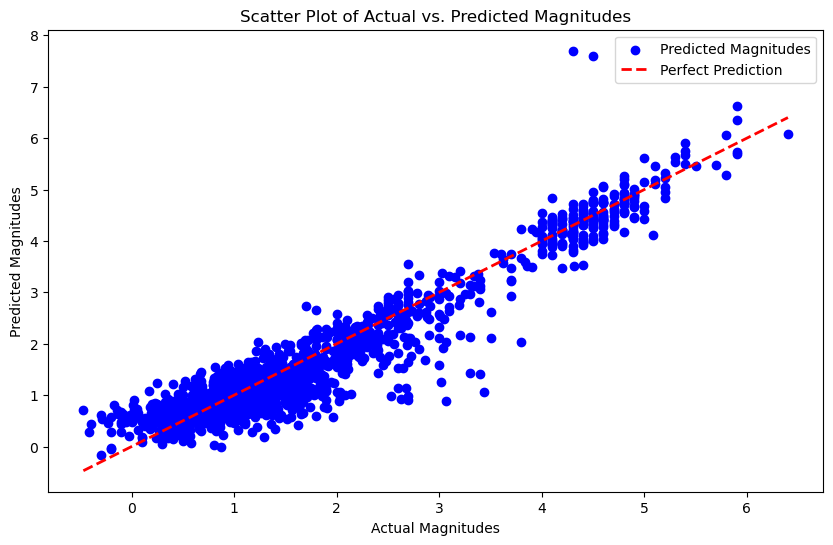

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, color='blue', label='Predicted Magnitudes')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel("Actual Magnitudes")
plt.ylabel("Predicted Magnitudes")
plt.title("Scatter Plot of Actual vs. Predicted Magnitudes")
plt.legend()
plt.show()

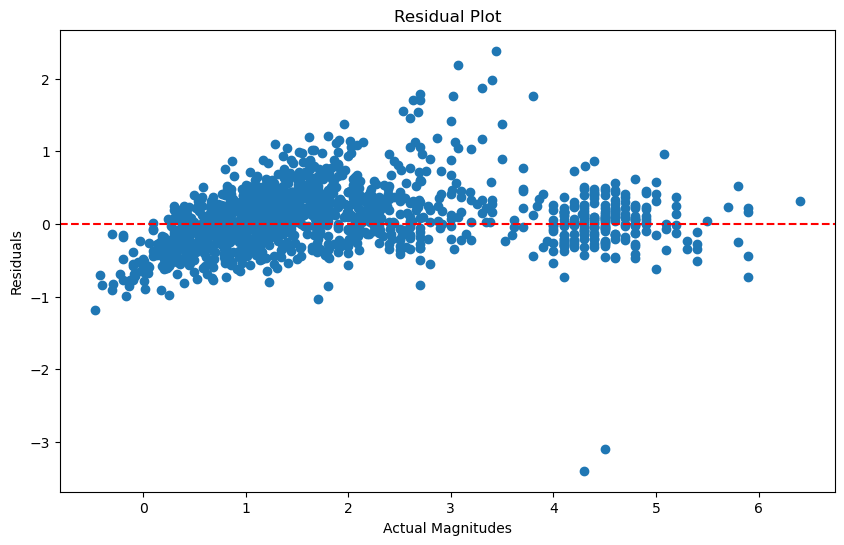

In [30]:
residuals = y_test - y_pred_nn.flatten()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Magnitudes")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

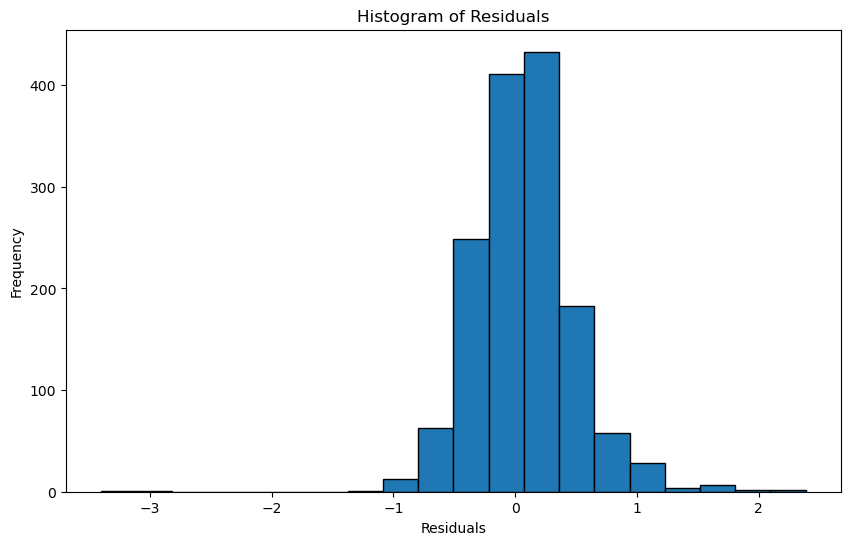

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

In [32]:
# ......................Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Make predictions
y_pred = model.predict(X_test)
y_pred[0:10]

array([1.43215726, 1.18537274, 1.79159783, 1.19219485, 5.44471729,
       1.62585615, 3.6938413 , 1.35629661, 4.62879149, 3.95814827])

In [34]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Validation RMSE: {rmse}")

Validation RMSE: 0.6253314350390512


In [35]:
# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.39
Root Mean Squared Error: 0.63
Mean Absolute Error: 0.49
R-squared: 0.80
